# Project 2

In this project, you will implement the exploratory analysis plan developed in Project 1. This will lay the groundwork for our our first modeling exercise in Project 3.

### Step 1: Load the python libraries you will need for this project 

In [87]:
#imports
from __future__ import division
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pylab as pl
import numpy as np
%matplotlib inline

### Step 2: Read in your data set 

In [88]:
#Read in data from source 
df_raw = pd.read_csv("../assets/admissions.csv", float_precision=2)
print df_raw.head()

   admit    gre   gpa  prestige
0      0  380.0  3.61       3.0
1      1  660.0  3.67       3.0
2      1  800.0  4.00       1.0
3      1  640.0  3.19       4.0
4      0  520.0  2.93       4.0


## Questions
#### Question 1. How many observations are in our dataset? 


In [89]:
df_raw.count()

admit       400
gre         398
gpa         398
prestige    399
dtype: int64

Answer: 400

#### Question 2. Create a summary table

In [90]:
#function

In [91]:
df_raw.describe()

,admit,gre,gpa,prestige
count,400.000000,398.000000,398.00000,399.000000
mean,0.317500,588.040201,3.39093,2.486216
std,0.466087,115.628513,0.38063,0.945333
min,0.000000,220.000000,2.26000,1.000000
25%,0.000000,NaN,NaN,NaN
50%,0.000000,NaN,NaN,NaN
75%,1.000000,NaN,NaN,NaN
max,1.000000,800.000000,4.00000,4.000000


#### Question 3. Why would GRE have a larger STD than GPA?

Answer: because GRE has larger values

#### Question 4. Drop data points with missing data


In [92]:
df_clean=df_raw.dropna()

In [93]:
df_clean.describe()

,admit,gre,gpa,prestige
count,397.000000,397.000000,397.000000,397.000000
mean,0.317380,587.858942,3.392242,2.488665
std,0.466044,115.717787,0.380208,0.947083
min,0.000000,220.000000,2.260000,1.000000
25%,0.000000,520.000000,3.130000,2.000000
50%,0.000000,580.000000,3.400000,2.000000
75%,1.000000,660.000000,3.670000,3.000000
max,1.000000,800.000000,4.000000,4.000000


#### Question 5. Confirm that you dropped the correct data. How can you tell? 

Answer: using describe function, all the statistics show a number value after clean-up.

#### Question 6. Create box plots for GRE and GPA

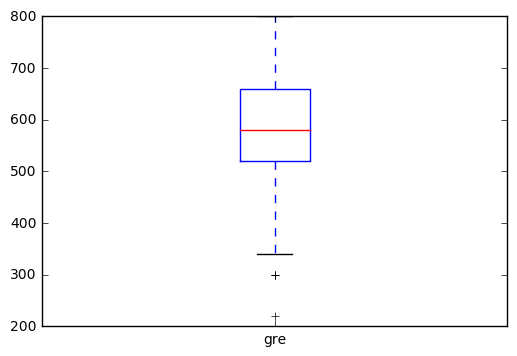

In [94]:
#boxplot 1
df_clean['gre'].plot(kind='box')
plt.show()

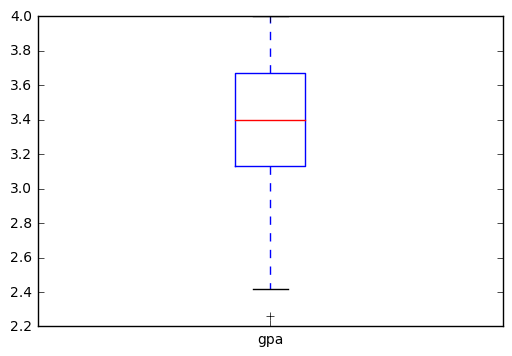

In [95]:
#boxplot 2 
df_clean['gpa'].plot(kind='box')
plt.show()

#### Question 7. What do this plots show?

Answer: std.deviation, the data spread, median quartile, max, min, upper quartile, lower quartile, central tendency. Boxplots also show outliers.

#### Question 8. Describe each distribution 

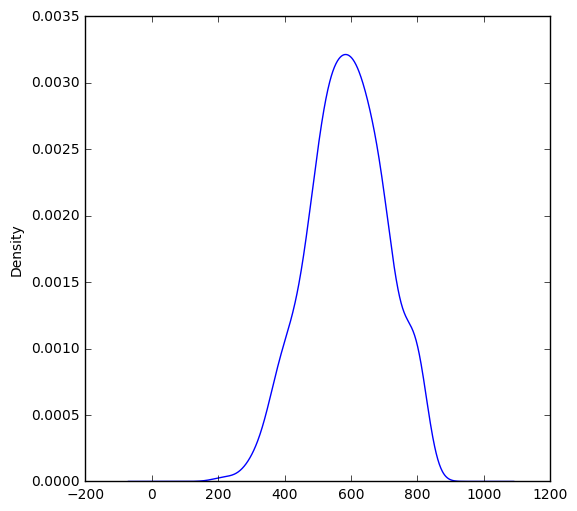

In [199]:
# plot the distribution of each variable 
df_clean['gre'].plot('density', figsize = (6,6))
plt.show()

In [201]:
df_clean['gre'].skew()

-0.146046988215597

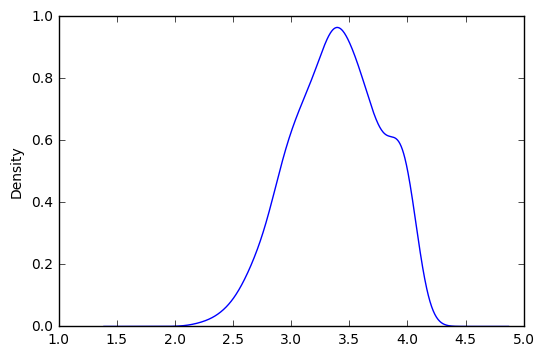

In [97]:
df_clean['gpa'].plot('density')
plt.show()

In [202]:
df_clean['gpa'].skew()

-0.21688893296924305

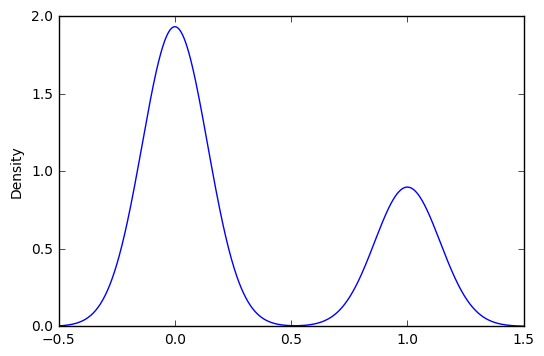

In [98]:
df_clean['admit'].plot('density')
plt.show()

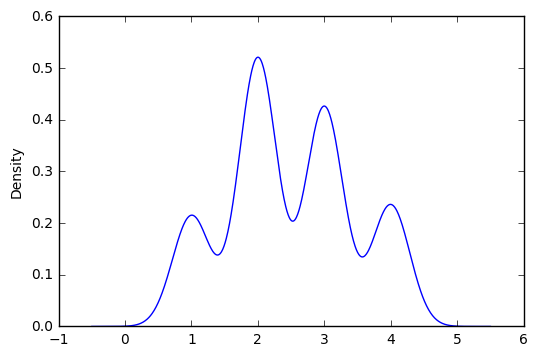

In [99]:
df_clean['prestige'].plot('density')
plt.show()

#### Question 9.  If our model had an assumption of a normal distribution would we meet that requirement? 

Answer: no.

#### Question 10.  Does this distribution need correction? If so, why? How? 

Answer: can be log tranformed

#### Question 11. Which of our variables are potentially colinear? 

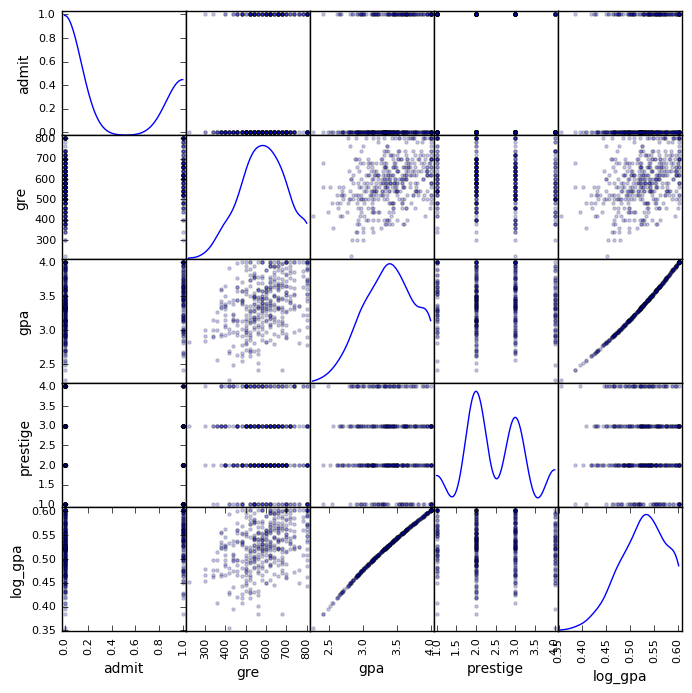

In [176]:
# create a correlation matrix for the data
from pandas.tools.plotting import scatter_matrix
scatter_matrix(df_clean, alpha=0.2, figsize=(8, 8), diagonal='kde')
#kde = kernel density estmation
plt.show()

#### Question 12. What did you find?

Answer: 'gre' and 'gpa' are correlated.

#### Question 13. Write an analysis plan for exploring the association between grad school admissions rates and prestige of  undergraduate schools.

Answer: 
propse a null Hypothesis and alternate hypothesis.
compare data sets for admitted and not admitted viz.: mean(), std.deviation, P-value and CI to either accept or reject the null hypothesis.

#### Question 14. What is your hypothesis? 

Answer: # Hypothesis-null: prestige is not important for admission.
        # Hypothesis-alternate: prestige is important for admission.

## Bonus/Advanced

#### 1. Bonus: Explore alternatives to dropping obervations with missing data

#### 2. Bonus: Log transform the skewed data

In [177]:
import math

/Users/randalgoomer/Documents/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


Axes(0.125,0.125;0.775x0.775)
Axes(0.125,0.125;0.775x0.775)


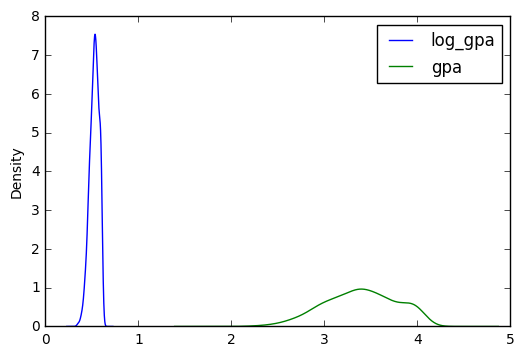

In [175]:
gpa = df_clean['gpa']
log_gpa = [math.log10(i) for i in gpa]
df_clean['log_gpa']=log_gpa
print df_clean['log_gpa'].plot(kind='density')
print df_clean['gpa'].plot(kind='density')
plt.legend()
plt.show()

#### 3. Advanced: Impute missing data

In [183]:
df_raw.fillna(0);           # fills with 0s
df_raw.fillna(method='pad') #fills with values above or below
df_raw.interpolate()        #interpolates missing values
df_raw.head()

,admit,gre,gpa,prestige
0,0,380.0,3.61,3.0
1,1,660.0,3.67,3.0
2,1,800.0,4.00,1.0
3,1,640.0,3.19,4.0
4,0,520.0,2.93,4.0
